
<div class="jumbotron">
  <h1 class="display-4">Exploratory Data Analysis and Visualization Using Python</h1>
  <p><b>Dataset</b>: Listings of movies and tv shows on Netflix - Kaggle</p>
  <hr class="my-4">
  <p>It uses utility classes for typography and spacing to space content out within the larger container.</p>
</div>

<div class="alert alert-success">
  <strong>I. Import libraries and Load the data</strong>
</div>

In [1]:
from IPython.display import clear_output
!pip install wordcloud
clear_output(wait=False)

In [2]:
!pip install pandas_profiling
clear_output(wait=False)

In [3]:
#pandas profiling for basic EDA
import pandas_profiling 
from pandas_profiling import ProfileReport 
#basic libraries for data analysis
import numpy as np 
import pandas as pd
from collections import Counter
#libraries for visualizing
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [4]:
#Load the dataset
df = pd.read_csv("netflix_titles.csv")

<div class="alert alert-success">
  <strong>II. Overview Dataset by Pandas Profiling Report</strong>
</div>

In [5]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<div class="alert alert-info" role="alert">
  <h4 class="alert-heading">Notes after Overviewing</h4>
  <p>
        <b>type</b> - has 2 unique values: Movie, TV Show.<br>
        <b>country</b> - some have more than 1 country, split by comma.<br>
        <b>date_added</b> - needs to be formated dd-mm-yyyy.<br>
        <b>duration</b> - has 2 types: season(s) for TV Show and min(s) for Movie.<br>
        <b>listed_in</b> - some have more than 1 genre, split by comma.<br>
  <hr>
  <p class="mb-0">Now, let's find the null values</p>
</div>

In [6]:
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print("[{}] has [{}] missing values, the null rate is [{:.2f} %] ".format(i,
                                                                                     df[i].isnull().sum(),
                                                                                     null_rate))

[director] has [2634] missing values, the null rate is [29.91 %] 
[cast] has [825] missing values, the null rate is [9.37 %] 
[country] has [831] missing values, the null rate is [9.44 %] 
[date_added] has [10] missing values, the null rate is [0.11 %] 
[rating] has [4] missing values, the null rate is [0.05 %] 
[duration] has [3] missing values, the null rate is [0.03 %] 


<div class="alert alert-warning" role="alert">
  <h4 class="alert-heading">Handle missing data and complete dataset</h4>
  <p>
        <b>director</b> - Fill nan value with 'No Information'<br>
        <b>cast</b> - Fill nan value with 'No Information'<br>
        <b>country</b> - Replace missing values with the most frequent value<br>
        <b>date_added, rating, duration</b> - The null rate of these features are few (<=10 missing values) so I will drop rows that have null values.<br>
</div>

In [7]:
df['director'] = df['director'].fillna('No Information')
df['cast'] = df['cast'].fillna('No Information')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df.dropna(inplace=True)

In [8]:
#format date-added
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

In [9]:
#split dataset by type
df_tv = df[df["type"] == "TV Show"]
df_mv = df[df["type"] == "Movie"]

<div class="alert alert-success">
  <strong>III. Using Data Visualization to Find Insights in Data</strong>
</div>

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">1. Distribution of Movie and TV Show</h4>
  <p>
      <b>Datasets - </b><mark>df</mark> <br>
        <b>Features - </b><mark>type</mark><br>
        <b>Chart type - </b><mark>Pie Chart</mark><br> 
    </p>
</div>

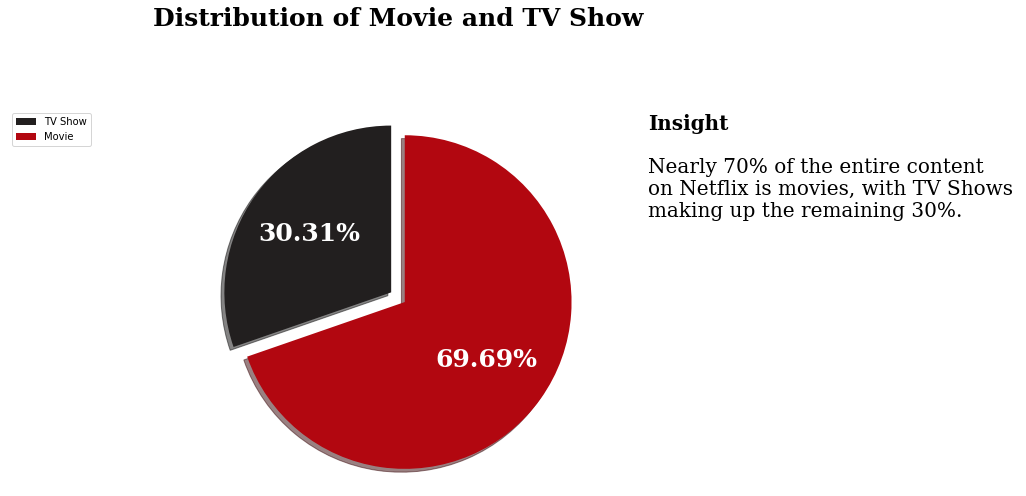

In [55]:
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),
        labels=labels,
        explode=[0.05,0.05],
        autopct='%1.2f%%',
        colors=['#221f1f','#b20710'],
        textprops={'color':"w",'fontsize': 25, 'fontweight':'bold','fontfamily':'serif'},
        startangle=90,
        shadow=True)
plt.title('Distribution of Movie and TV Show',fontfamily='serif', fontsize=25,fontweight='bold',y=1.2)
plt.legend(loc=2)
plt.axis('equal')
plt.text(1.5, 1, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')

plt.text(1.5, 0.35, '''
Nearly 70% of the entire content 
on Netflix is movies, with TV Shows 
making up the remaining 30%.
'''
         , fontsize=20, fontweight='light', fontfamily='serif')
plt.show()

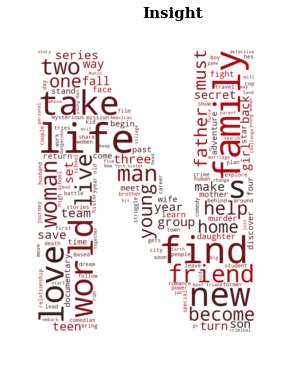

In [128]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib
def wordcloud_visualize(data):
    # Custom colour map based on Netflix palette
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])
    text = str(list(data)).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
    mask = np.array(Image.open('Netflix-logo.png'))
    wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150, mask = mask).generate(text)
    plt.figure( figsize=(5,5))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.text(500, 0, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
    plt.show()
wordcloud_visualize(df['description'])

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">2. Which country has most contents on Netflix</h4>
  <p>
      <b>Datasets - </b><mark>df_mv</mark>,<mark>df_tv</mark> <br>
        <b>Features - </b><mark>type</mark><br>
        <b>Chart type - </b><mark>Stacked Bar Chart</mark><br> 
    </p>
</div>

In [13]:
content_movie = dict(Counter(','.join(df_mv['country']).replace(' ,',',').replace(', ',',').split(',')))
content_tv    = dict(Counter(','.join(df_tv['country']).replace(' ,',',').replace(', ',',').split(',')))
content       = dict(Counter(','.join(df['country']).replace(' ,',',').replace(', ',',').split(',')))
d_temp = [content,content_movie,content_tv]
df_content = pd.DataFrame(d_temp).replace(np.nan, 0).T
df_content.rename(columns = {0:'total',1:'movie',2:'tvshow'},inplace=True)
df_content = df_content.sort_values(by=['total'],ascending=False)[:10]

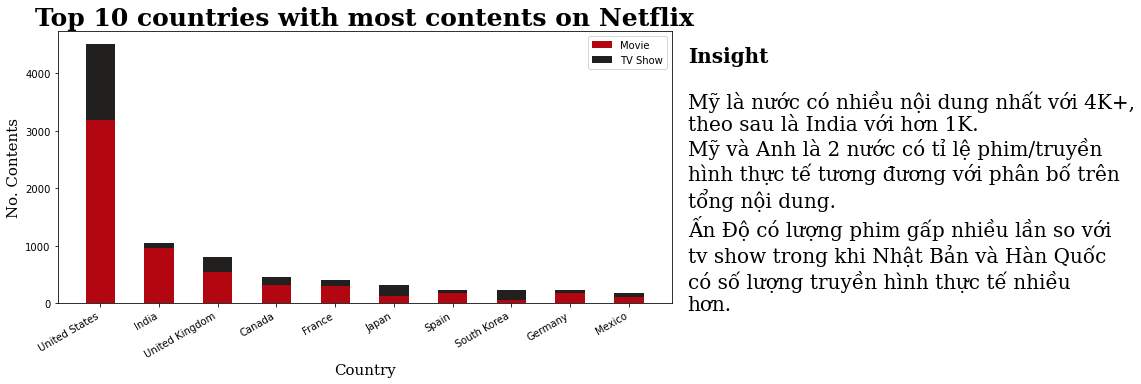

In [67]:
fig = plt.figure(figsize = (11, 5))
#data
x = df_content.index
y1 = df_content.movie
y2 = df_content.tvshow
# plot bars in stack manner
plt.bar(x, y1, color='#b20710',width = 0.5)
plt.bar(x, y2, bottom=y1, color='#221f1f',width = 0.5)

plt.legend(["Movie","TV Show"])

plt.xlabel("Country",fontfamily='serif',fontsize=15) 
plt.xticks(rotation=30, ha='right') #avoid text overlaping
plt.ylabel("No. Contents",fontfamily='serif',fontsize=15)

plt.title("Top 10 countries with most contents on Netflix",fontfamily='serif', fontsize=25,fontweight='bold',y=1)
plt.text(10, 4200, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')
plt.text(10, -500, '''
Mỹ là nước có nhiều nội dung nhất với 4K+,
theo sau là India với hơn 1K.
Mỹ và Anh là 2 nước có tỉ lệ phim/truyền
hình thực tế tương đương với phân bố trên
tổng nội dung.
Ấn Độ có lượng phim gấp nhiều lần so với
tv show trong khi Nhật Bản và Hàn Quốc
có số lượng truyền hình thực tế nhiều
hơn.
'''
         , fontsize=20, fontweight='light', fontfamily='serif')
plt.show()

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">3. How many contents have been added over the years</h4>
  <p>
      <b>Datasets - </b><mark>df_mv</mark>,<mark>df_tv</mark> <br>
        <b>Features - </b><mark>type</mark>,<mark>year_added</mark>,<mark>month_added</mark><br>
        <b>Chart type - </b><mark>Line Chart</mark><br> 
    </p>
</div>

### 3.1 By Year

In [15]:
mv_year = dict(Counter(df_mv['year_added']))
tv_year = dict(Counter(df_tv['year_added']))
d_temp_year = [mv_year,tv_year] 
df_year = pd.DataFrame(d_temp_year).replace(np.nan, 0).T
df_year.rename(columns = {0:'movie',1:'tvshow'},inplace=True)
df_year = df_year.sort_index()

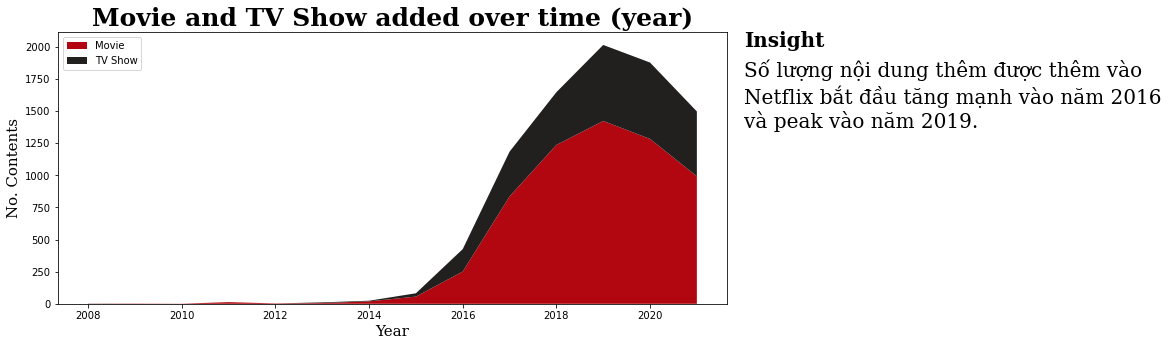

In [69]:
fig = plt.figure(figsize = (12, 5))
x = df_year.index
y1 = df_year.movie
y2 = df_year.tvshow

colors = ['#b20710','#221f1f']
label_name = ['Movie','TV Show']
plt.stackplot(x,y1, y2, labels= label_name, colors = colors)
plt.ylabel("No. Contents",fontfamily='serif',fontsize=15) 
plt.xlabel("Year",fontfamily='serif',fontsize=15)

plt.title('Movie and TV Show added over time (year)',fontfamily='serif', fontsize=25,fontweight='bold',y=1)
plt.legend(["Movie","TV Show"])
plt.legend(loc=2)

#plt.axis('left')
plt.text(2022,2000, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')
plt.text(2022,1200, '''
Số lượng nội dung thêm được thêm vào
Netflix bắt đầu tăng mạnh vào năm 2016
và peak vào năm 2019.
'''
         , fontsize=20, fontweight='light', fontfamily='serif')
plt.show()

### 3.2 By Month

In [17]:
mv_month = dict(Counter(df_mv['month_added']))
tv_moth = dict(Counter(df_tv['month_added']))
y = [mv_month,tv_moth] 
month_added = pd.DataFrame(y).replace(np.nan, 0).T
month_added.rename(columns = {0:'movie',1:'tvshow'},inplace=True)
month_added = month_added.sort_index()
#month_added

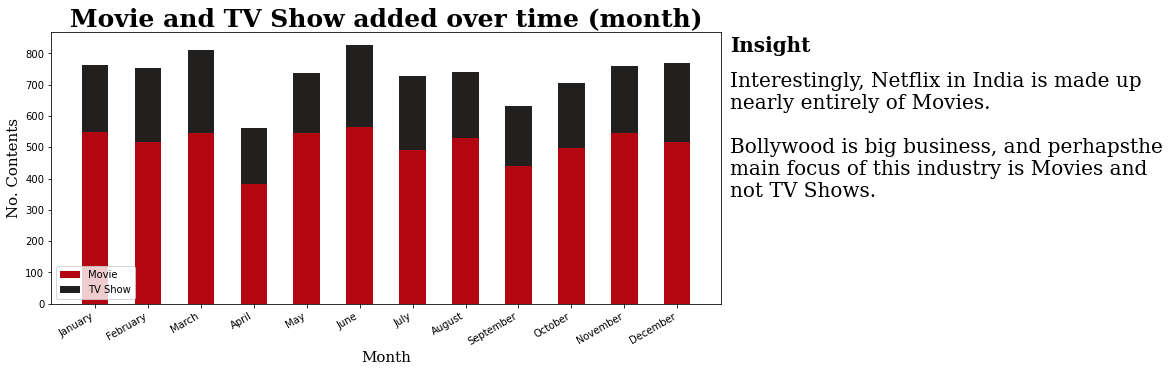

In [88]:
fig = plt.figure(figsize = (12, 5))
x = ['January','February','March','April','May','June','July','August','September','October','November','December']
y1 = month_added.movie
y2 = month_added.tvshow
colors = ['#b20710','#221f1f']
label_name = ['Movie','TV Show']
# plot bars in stack manner
plt.bar(x, y1, color='#b20710',width = 0.5)
plt.bar(x, y2, bottom=y1, color='#221f1f',width = 0.5)
#x,y label
plt.ylabel("No. Contents",fontfamily='serif',fontsize=15) 
plt.xticks(rotation=30, ha='right') #avoid text overlaping
plt.xlabel("Month",fontfamily='serif',fontsize=15)
plt.title('Movie and TV Show added over time (month)',fontfamily='serif',fontweight='bold', fontsize=25,y=1)
plt.legend(["Movie","TV Show"],loc=3)

plt.text(12,805, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')
plt.text(12,270, '''
Interestingly, Netflix in India is made up 
nearly entirely of Movies. 

Bollywood is big business, and perhapsthe 
main focus of this industry is Movies and 
not TV Shows.
'''
         , fontsize=20, fontweight='light', fontfamily='serif')
plt.show()

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">4. Distribution of Rating in Movie/TV Show</h4>
  <p>
      <b>Datasets using- </b><mark>df_mv</mark>,<mark>df_tv</mark> <br>
        <b>Features using- </b><mark>type</mark>,<mark>rating</mark><br>
        <b>Chart type using - </b><mark>Bidirectional Bar Chart</mark><br> 
    </p>
</div>


In [19]:
movie_rating = dict(Counter(','.join(df_mv['rating']).replace(' ,',',').replace(', ',',').split(',')))
tv_rating = dict(Counter(','.join(df_tv['rating']).replace(' ,',',').replace(', ',',').split(',')))

In [20]:
rating = [movie_rating,tv_rating] 
rating2 = pd.DataFrame(rating).replace(np.nan, 0).T
rating2.rename(columns = {0:'movie',1:'tvshow'},inplace=True)
rating2['tvshow'] = rating2['tvshow'].multiply(-1)
rating2 = rating2.sort_values(by=['movie'],ascending=True)
#rating2

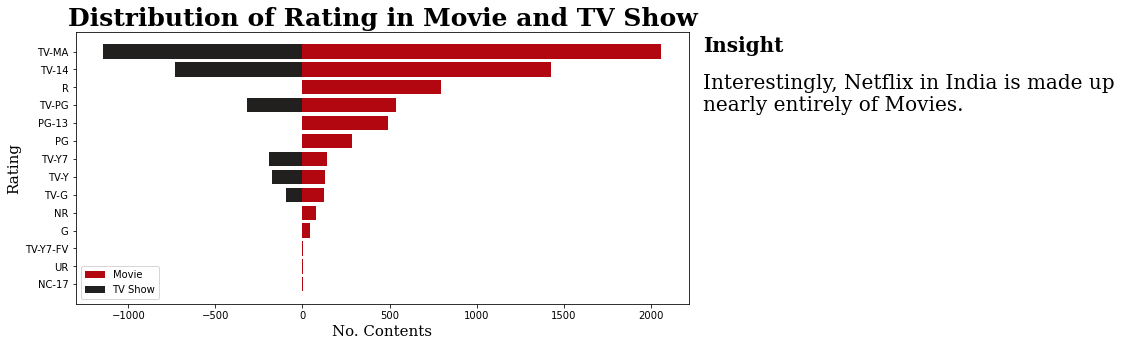

In [91]:
fig = plt.figure(figsize = (11, 5))
x   = rating2.index
y1  = rating2.movie
y2  = rating2.tvshow
# plot bars in stack manner
#X_axis = np.arange(len(x))

plt.barh(x,y1, color='#b20710')
plt.barh(x,y2, color='#221f1f')

#plt.bar(x, y1, color='#b20710',width = 0.5)
#plt.bar(x, y2, color='#221f1f',width = 0.5)
plt.legend(["Movie","TV Show"])

plt.ylabel("Rating",fontfamily='serif',fontsize=15) 
plt.xlabel("No. Contents",fontfamily='serif',fontsize=15)

plt.title("Distribution of Rating in Movie and TV Show",fontfamily='serif', fontsize=25,fontweight='bold',y=1)
plt.text(2300, 13, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')
plt.text(2300, 6, '''
Interestingly, Netflix in India is made up 
nearly entirely of Movies. 


'''
         , fontsize=20, fontweight='light', fontfamily='serif')
plt.show()

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">5. Genre correlation in Movie/TV Show</h4>
  <p>
      <b>Datasets using- </b><mark>df_mv</mark>,<mark>df_tv</mark> <br>
        <b>Features using- </b><mark>listed_in</mark><br>
        <b>Chart type using - </b><mark>Correlation Heatmap</mark><br> 
    </p>
</div>


In [113]:
movie_genre = dict(Counter(','.join(df_mv['listed_in']).replace(' ,',',').replace(', ',',').split(',')))
genre = pd.DataFrame(movie_genre.items(), columns=['genre','count'])
temp = df_mv[['show_id', 'listed_in']]
new_df = pd.concat([temp.drop(columns=['listed_in']), temp['listed_in'].str.get_dummies(sep=", ")], axis=1)

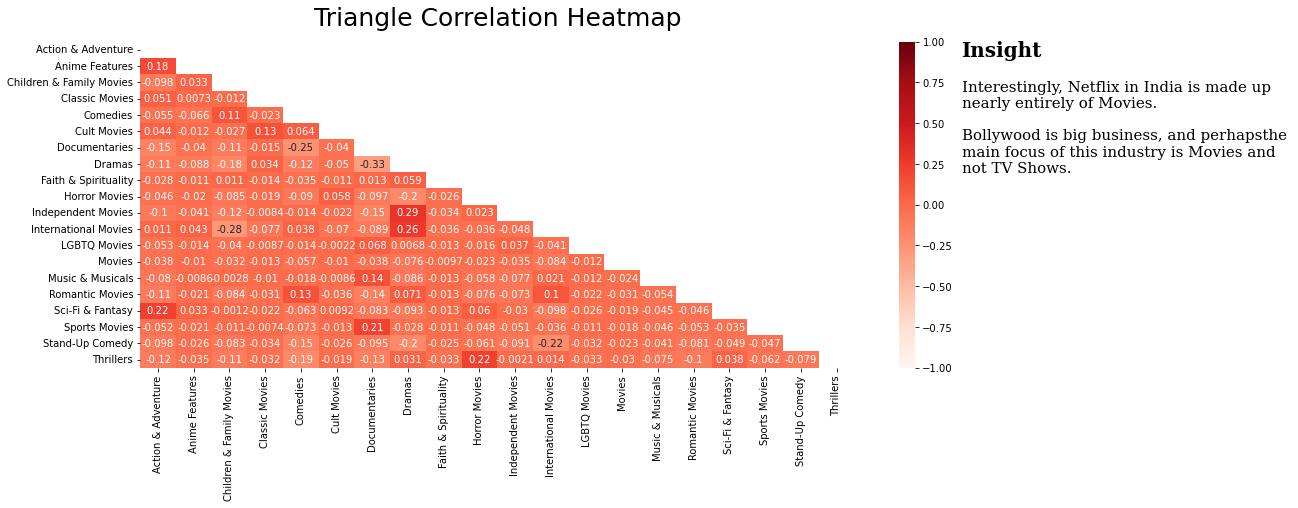

In [114]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(new_df.corr(), dtype=bool))
heatmap = sns.heatmap(new_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Reds')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':25}, pad=16);
plt.text(23, 0.9, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')
plt.text(23, 9, '''
Interestingly, Netflix in India is made up 
nearly entirely of Movies. 

Bollywood is big business, and perhapsthe 
main focus of this industry is Movies and 
not TV Shows.
'''
         , fontsize=15, fontweight='light', fontfamily='serif')
plt.show()

In [106]:
tv_genre = dict(Counter(','.join(df_tv['listed_in']).replace(' ,',',').replace(', ',',').split(',')))
genre = pd.DataFrame(tv_genre.items(), columns=['genre','count'])
temp = df_tv[['show_id', 'listed_in']]
new_df = pd.concat([temp.drop(columns=['listed_in']), temp['listed_in'].str.get_dummies(sep=", ")], axis=1)

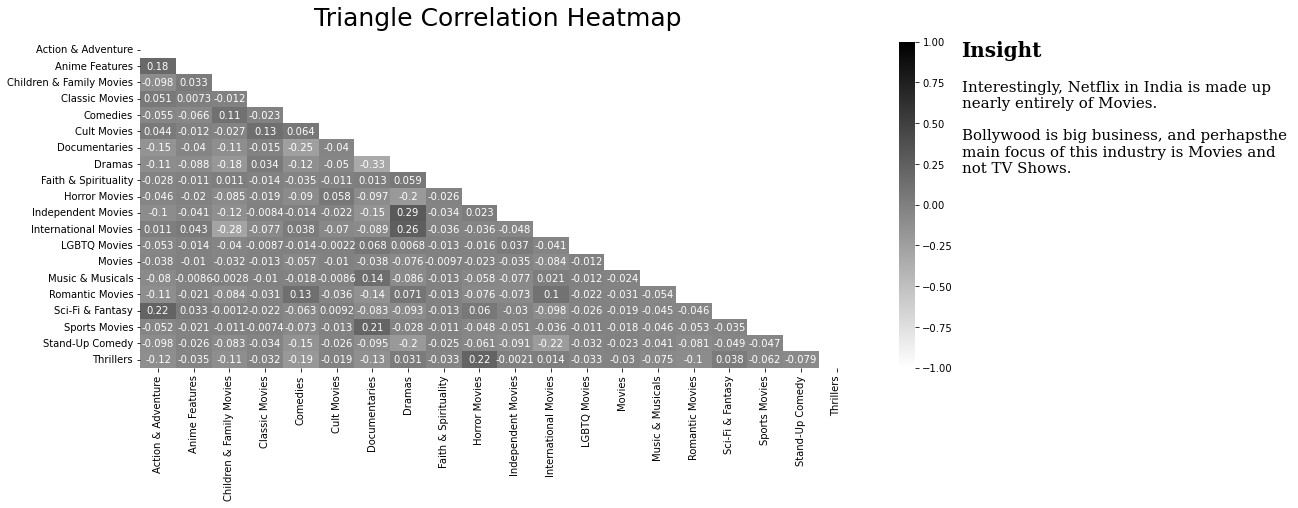

In [112]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(new_df.corr(), dtype=bool))
heatmap = sns.heatmap(new_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='gray_r')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':25}, pad=16);

plt.text(23, 0.9, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')
plt.text(23, 9, '''
Interestingly, Netflix in India is made up 
nearly entirely of Movies. 

Bollywood is big business, and perhapsthe 
main focus of this industry is Movies and 
not TV Shows.
'''
         , fontsize=15, fontweight='light', fontfamily='serif')
plt.show()

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">6. Average duration of a movie/tv show</h4>
  <p>
      <b>Datasets using- </b><mark>df_mv</mark>,<mark>df_tv</mark> <br>
        <b>Features using- </b><mark>duration</mark><br>
        <b>Chart type using - </b><mark>Histogram</mark><br> 
    </p>
</div>


In [26]:
duration_movie = df_mv['duration'].str.split(" ").str[0].astype(int)

<Figure size 1152x720 with 0 Axes>

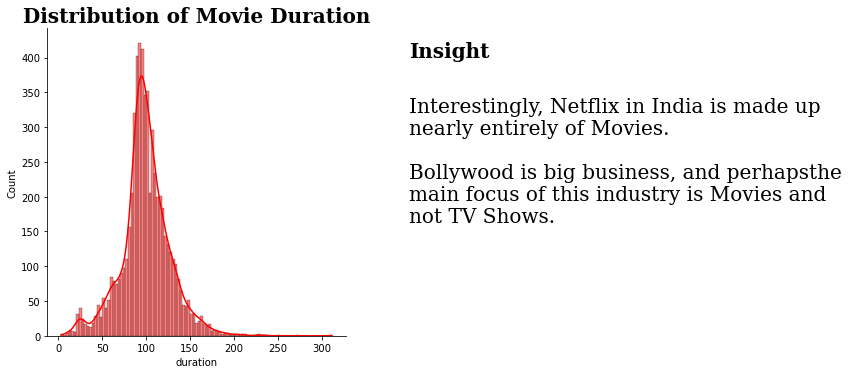

In [118]:
plt.figure(figsize=(16,10))
sns.displot(data = duration_movie,kde=True,color='r')
plt.title("Distribution of Movie Duration",fontfamily='serif', fontsize=20,fontweight='bold',y=1)
plt.text(400, 400, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')
plt.text(400, 100, '''
Interestingly, Netflix in India is made up 
nearly entirely of Movies. 

Bollywood is big business, and perhapsthe 
main focus of this industry is Movies and 
not TV Shows.

'''
         , fontsize=20, fontweight='light', fontfamily='serif')
plt.show()

In [28]:
s =dict(sorted(dict(Counter(df_tv['duration'])).items()))
df_season = pd.DataFrame.from_dict(s,orient ='index')
df_season.rename(columns = {0:'total'},inplace=True)
df_season = df_season.sort_values(by=['total'],ascending=False)
#df_season

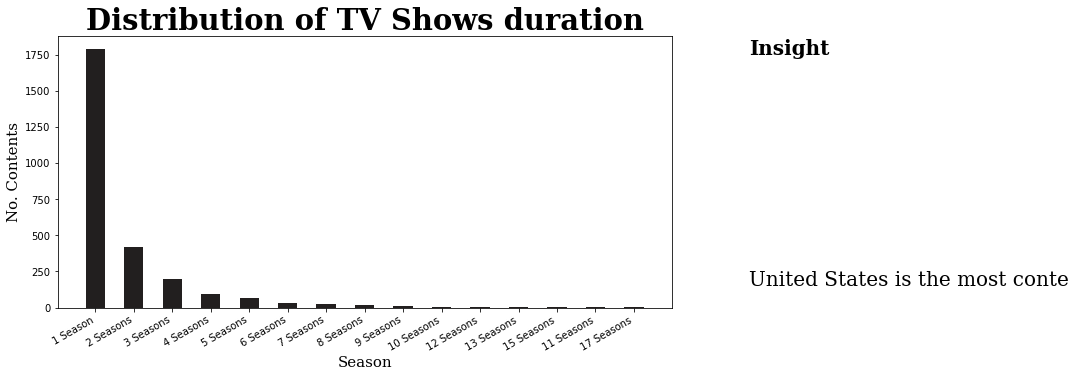

In [121]:
fig = plt.figure(figsize = (11, 5))
#data
x = df_season.index
y = df_season.total
# plot bar
plt.bar(x, y, color='#221f1f',width = 0.5)
#plt.legend(["Movie","TV Show"])
plt.xlabel("Season",fontfamily='serif',fontsize=15) 
plt.xticks(rotation=30, ha='right') #avoid text overlaping
plt.ylabel("No. Contents",fontfamily='serif',fontsize=15)

plt.title("Distribution of TV Shows duration",fontfamily='serif', fontsize=29,fontweight='bold',y=1)
plt.text(17, 1750, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')
plt.text(17, 0, '''
United States is the most conte
'''
         , fontsize=20, fontweight='light', fontfamily='serif')
plt.show()